In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Leer la data
direccion = '.\\data\\data.xlsx'
# humedad relativa
df_humedad_relativa = pd.read_excel(direccion, sheet_name='Hoja1')
# Velocidad del viento
df_velocidad_del_viento = pd.read_excel(direccion, sheet_name='Hoja2')
# Temperatura maxima
df_temperatura_maxima = pd.read_excel(direccion, sheet_name='Hoja3')
# Temperatura minima
df_temperatura_minima = pd.read_excel(direccion, sheet_name='Hoja4')
#la tabla tiene los valores iniciales para interpolar y calcular valores
df_datos_iniciales = pd.read_excel(direccion, sheet_name='Hoja5')
# nombramos los caracteres que denoten un valor faltante
valor_faltante = '****'
#constantes
latitud = 18.4902777777778 #latitud
z=5 #altura de medicion sobre la superficie (m)
elevacion=2011 #Elevacionde la zona


In [3]:
# modificamos el nombre de las columnas para tener homogeneidad
nombre_columnas = ['AŃO', 'ENE', 'FEB', 'MAR', 'ABR',
                   'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL']
df_humedad_relativa .columns = nombre_columnas
df_velocidad_del_viento.columns = nombre_columnas
df_temperatura_maxima.columns = nombre_columnas
df_temperatura_minima.columns = nombre_columnas
# visualizacion de datos iniciales sin corregir de la humedad relativa
df_humedad_relativa .head(5)


,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990,69.5,69.9,64.5,69.2,64.3,68.9,58.7,65.2,59.2,58,64.1,67.4,64.908333
1,1991,74.8,76.1,76.9,76.4,75.9,71.9,62,60.8,55.2,62.9,69.4,63.2,68.791667
2,1992,69.9,76.9,74.8,76,78,76.5,76.5,63.7,68.1,70.7,63.2,71.6,72.158333
3,1993,76.0,70.5,72.3,72.5,72.2,65.7,68.5,65.9,64.2,61.8,65.1,70.3,68.750000
4,1994,68.0,76.9,66.4,76.7,73,65,69.4,61.7,61.4,67.6,69.7,69.5,68.775000


In [4]:
# visualizacion de datos iniciales sin corregir de la Valocidad del viento
df_velocidad_del_viento.head(5)


,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990,15.6,15.5,16.8,15.4,14.6,11.2,15.9,18.4,16.1,18.0,18.3,15.8,16
1,1991,15.4,15.5,13.4,15.3,12.7,16.0,15.7,20.3,17.3,15.1,12.7,10.6,15
2,1992,9.4,6.4,8.9,10.8,8.8,11.0,10.6,10.9,12.4,10.8,10.2,8.8,9.9
3,1993,7.4,8.8,7.6,10.7,10.1,10.0,14.3,10.0,12.6,13.4,10.8,8.7,10.4
4,1994,4.6,7.2,8.3,10.1,8.2,9.1,10.6,11.8,15.2,11.8,16.1,11.3,10.4


In [5]:
#visualizacion de datos de la temperatura maxima
df_temperatura_maxima.head(5)

,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990,22.9,23.1,24.6,22.9,21.3,19.4,18.5,20.4,20.8,24.2,24.5,23.9,22.2
1,1991,22.9,22.1,22.4,22.1,21.2,20.1,20.6,20.5,23.3,22.0,22.2,25.5,22.1
2,1992,23.7,23.7,22.2,21.2,21.2,20.6,17.0,20.0,20.2,22.9,22.8,23.3,21.6
3,1993,22.6,22.0,22.8,21.8,21.3,21.5,18.0,19.8,20.7,23.4,24.1,23.6,21.8
4,1994,23.2,22.6,21.9,20.9,22.0,20.7,19.2,22.2,23.9,23.3,22.9,23.6,22.2


In [6]:
#visualizacion de datos de la temperatura minima
df_temperatura_minima.head(5)

,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990,11.7,13.2,12.7,12.3,9.6,6.9,4.5,7.7,8.7,12.1,13.7,13.8,10.6
1,1991,14.5,13.5,13.6,11.7,10.5,7.8,6.5,8.6,10.9,12.0,13.2,15.4,11.5
2,1992,14.7,13.0,12.4,11.7,11.7,11.3,6.1,7.9,9.5,12.1,11.3,13.1,11.2
3,1993,13.0,11.5,12.6,11.6,9.3,6.7,6.7,6.8,9.6,12.1,12.8,13.5,10.5
4,1994,13.3,13.9,12.0,12.6,11.0,7.0,6.8,8.8,11.0,12.9,13.4,14.4,11.4


In [7]:
# El siguiente codigo corrige los datos, convirtiendolo en numericos decimales y remplazando los valores faltantes con la mediana
def correccionDeDatos(nombre_df, valor_faltante):
    df = pd.DataFrame(nombre_df, columns=list(nombre_df))

    # Conversion de los datos a valor numerico
    for i in nombre_columnas:
        df[i] = df[i].replace(valor_faltante, np.nan)
        df[i] = pd.to_numeric(df[i], downcast='float')
        # sustitucion de valores faltanres por la mediana
        mediana = df[i].median()
        df[i] = df[i].replace(np.nan, mediana)
    return df


In [8]:
df_humedad_relativa = correccionDeDatos(df_humedad_relativa, valor_faltante)
# numero de datos
cantidad_de_datos_humedad = df_humedad_relativa.shape[0]
# tabla corregida
df_humedad_relativa


,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990.0,69.500000,69.900002,64.500000,69.199997,64.300003,68.900002,58.700001,65.199997,59.200001,58.000000,64.099998,67.400002,64.908333
1,1991.0,74.800003,76.099998,76.900002,76.400002,75.900002,71.900002,62.000000,60.799999,55.200001,62.900002,69.400002,63.200001,68.791664
2,1992.0,69.900002,76.900002,74.800003,76.000000,78.000000,76.500000,76.500000,63.700001,68.099998,70.699997,63.200001,71.599998,72.158333
3,1993.0,76.000000,70.500000,72.300003,72.500000,72.199997,65.699997,68.500000,65.900002,64.199997,61.799999,65.099998,70.300003,68.750000
4,1994.0,68.000000,76.900002,66.400002,76.699997,73.000000,65.000000,69.400002,61.700001,61.400002,67.599998,69.699997,69.500000,68.775002
5,1995.0,74.900002,75.199997,77.000000,76.099998,75.599998,73.400002,71.800003,70.300003,65.599998,65.800003,64.199997,67.199997,71.425003
6,1996.0,75.800003,74.900002,73.199997,73.300003,75.400002,77.099998,66.599998,62.599998,64.199997,66.800003,69.900002,74.900002,71.224998
7,1997.0,73.000000,77.400002,76.199997,72.699997,71.400002,70.199997,71.599998,71.000000,67.800003,67.400002,71.599998,67.900002,71.516670
8,1998.0,70.300003,77.099998,80.400002,81.400002,70.900002,72.199997,72.400002,64.699997,59.799999,63.000000,70.400002,64.199997,70.566666
9,1999.0,68.800003,71.500000,78.099998,75.699997,80.400002,73.099998,67.199997,56.599998,62.799999,70.599998,77.199997,77.300003,71.608330


In [9]:
df_velocidad_del_viento = correccionDeDatos(df_velocidad_del_viento, valor_faltante)
# numero de datos
cantidad_de_datos_vel_viento = df_velocidad_del_viento.shape[0]
# tabla corregida
df_velocidad_del_viento


,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990.0,15.6,15.5,16.799999,15.4,14.6,11.200000,15.900000,18.400000,16.100000,18.000000,18.299999,15.80,16.0
1,1991.0,15.4,15.5,13.400000,15.3,12.7,16.000000,15.700000,20.299999,17.299999,15.100000,12.700000,10.60,15.0
2,1992.0,9.4,6.4,8.900000,10.8,8.8,11.000000,10.600000,10.900000,12.400000,10.800000,10.200000,8.80,9.9
3,1993.0,7.4,8.8,7.600000,10.7,10.1,10.000000,14.300000,10.000000,12.600000,13.400000,10.800000,8.70,10.4
4,1994.0,4.6,7.2,8.300000,10.1,8.2,9.100000,10.600000,11.800000,15.200000,11.800000,16.100000,11.30,10.4
5,1995.0,8.1,8.3,8.200000,10.2,10.5,11.300000,14.200000,15.200000,17.700001,18.299999,13.000000,9.30,12.0
6,1996.0,10.5,7.8,12.000000,14.9,8.6,11.600000,9.600000,11.300000,16.700001,13.700000,14.500000,14.00,12.1
7,1997.0,8.7,10.5,11.100000,11.8,11.5,15.800000,17.600000,17.500000,16.000000,19.799999,17.500000,18.00,14.6
8,1998.0,15.9,16.6,14.800000,15.6,9.1,12.300000,15.000000,17.799999,18.799999,15.800000,15.400000,11.80,14.9
9,1999.0,14.1,10.9,9.800000,13.8,11.0,11.600000,13.100000,15.500000,12.100000,13.000000,13.200000,9.30,12.3


In [10]:
#Conversion de km/hr a m/s
valores_anuales_de_vel = df_velocidad_del_viento['AŃO']
df_velocidad_del_viento_ms = df_velocidad_del_viento*1000/3600
df_velocidad_del_viento_ms['AŃO']=df_velocidad_del_viento['AŃO']
df_velocidad_del_viento_ms

,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990.0,4.333333,4.305555,4.666667,4.277778,4.055555,3.111111,4.416667,5.111111,4.472222,5.000000,5.083333,4.388889,4.444445
1,1991.0,4.277778,4.305555,3.722222,4.250000,3.527778,4.444445,4.361111,5.638889,4.805555,4.194445,3.527778,2.944444,4.166667
2,1992.0,2.611111,1.777778,2.472222,3.000000,2.444444,3.055556,2.944444,3.027778,3.444444,3.000000,2.833333,2.444444,2.750000
3,1993.0,2.055556,2.444444,2.111111,2.972222,2.805556,2.777778,3.972222,2.777778,3.500000,3.722222,3.000000,2.416667,2.888889
4,1994.0,1.277778,2.000000,2.305556,2.805556,2.277778,2.527778,2.944444,3.277778,4.222222,3.277778,4.472222,3.138889,2.888889
5,1995.0,2.250000,2.305556,2.277778,2.833333,2.916667,3.138889,3.944444,4.222222,4.916667,5.083333,3.611111,2.583333,3.333333
6,1996.0,2.916667,2.166667,3.333333,4.138889,2.388889,3.222222,2.666667,3.138889,4.638889,3.805556,4.027778,3.888889,3.361111
7,1997.0,2.416667,2.916667,3.083333,3.277778,3.194444,4.388889,4.888889,4.861111,4.444445,5.500000,4.861111,5.000000,4.055555
8,1998.0,4.416667,4.611111,4.111111,4.333333,2.527778,3.416667,4.166667,4.944445,5.222222,4.388889,4.277778,3.277778,4.138889
9,1999.0,3.916667,3.027778,2.722222,3.833333,3.055556,3.222222,3.638889,4.305555,3.361111,3.611111,3.666667,2.583333,3.416667


In [11]:
df_temperatura_maxima = correccionDeDatos(df_temperatura_maxima, valor_faltante)
# numero de datos
cantidad_de_datos_temperatura_max = df_temperatura_maxima.shape[0]
# tabla corregida
df_temperatura_maxima

,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990.0,22.900000,23.100000,24.600000,22.900000,21.299999,19.400000,18.500000,20.400000,20.799999,24.200001,24.500000,23.900000,22.200001
1,1991.0,22.900000,22.100000,22.400000,22.100000,21.200001,20.100000,20.600000,20.500000,23.299999,22.000000,22.200001,25.500000,22.100000
2,1992.0,23.700001,23.700001,22.200001,21.200001,21.200001,20.600000,17.000000,20.000000,20.200001,22.900000,22.799999,23.299999,21.600000
3,1993.0,22.600000,22.000000,22.799999,21.799999,21.299999,21.500000,18.000000,19.799999,20.700001,23.400000,24.100000,23.600000,21.799999
4,1994.0,23.200001,22.600000,21.900000,20.900000,22.000000,20.700001,19.200001,22.200001,23.900000,23.299999,22.900000,23.600000,22.200001
5,1995.0,23.200001,22.400000,22.299999,21.200001,20.200001,21.400000,20.900000,21.000000,22.400000,23.600000,25.000000,24.100000,22.299999
6,1996.0,23.100000,23.400000,23.299999,22.600000,21.500000,19.700001,20.900000,22.400000,22.900000,23.700001,23.600000,23.000000,22.500000
7,1997.0,24.000000,22.600000,22.000000,22.500000,21.700001,22.600000,22.400000,21.900000,24.900000,24.799999,23.500000,24.900000,23.200001
8,1998.0,25.500000,24.000000,23.100000,21.500000,20.200001,20.100000,20.100000,22.400000,22.400000,23.500000,23.100000,23.900000,22.500000
9,1999.0,23.000000,23.600000,22.600000,20.900000,19.400000,19.900000,19.600000,21.700001,24.200001,22.700001,23.200001,22.900000,22.000000


In [12]:
df_temperatura_minima = correccionDeDatos(df_temperatura_minima, valor_faltante)
# numero de datos
cantidad_de_datos_temperatura_min = df_temperatura_minima.shape[0]
# tabla corregida
df_temperatura_minima

,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990.0,11.7,13.2,12.7,12.3,9.6,6.9,4.5,7.7,8.7,12.1,13.7,13.8,10.6
1,1991.0,14.5,13.5,13.6,11.7,10.5,7.8,6.5,8.6,10.9,12.0,13.2,15.4,11.5
2,1992.0,14.7,13.0,12.4,11.7,11.7,11.3,6.1,7.9,9.5,12.1,11.3,13.1,11.2
3,1993.0,13.0,11.5,12.6,11.6,9.3,6.7,6.7,6.8,9.6,12.1,12.8,13.5,10.5
4,1994.0,13.3,13.9,12.0,12.6,11.0,7.0,6.8,8.8,11.0,12.9,13.4,14.4,11.4
5,1995.0,14.6,13.5,14.1,11.6,9.4,9.0,10.2,9.3,10.9,12.6,13.3,13.9,11.9
6,1996.0,13.7,13.4,12.7,12.1,10.7,6.8,6.8,8.4,7.8,9.9,11.8,12.9,10.6
7,1997.0,13.5,13.5,13.3,11.3,9.2,8.6,9.2,7.8,11.5,12.3,13.1,14.6,11.5
8,1998.0,14.6,13.8,13.9,13.0,7.4,8.0,9.4,9.9,9.2,11.4,12.8,12.0,11.3
9,1999.0,12.5,13.0,13.5,10.2,9.7,7.3,7.6,6.1,11.0,11.3,11.1,14.2,10.6


In [13]:
df_temperatura_media=(df_temperatura_maxima+df_temperatura_minima)/2
# tabla corregida
df_temperatura_media

,AŃO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,1990.0,17.299999,18.150000,18.650000,17.600000,15.450000,13.150000,11.500000,14.049999,14.750000,18.150002,19.100000,18.850000,16.400002
1,1991.0,18.700001,17.799999,18.000000,16.900000,15.850000,13.950001,13.550000,14.550000,17.099998,17.000000,17.700001,20.450001,16.799999
2,1992.0,19.200001,18.350000,17.299999,16.450001,16.450001,15.950001,11.550000,13.950000,14.850000,17.500000,17.049999,18.200001,16.400000
3,1993.0,17.799999,16.750000,17.700001,16.700001,15.299999,14.100000,12.350000,13.299999,15.150001,17.750000,18.450001,18.549999,16.150000
4,1994.0,18.250000,18.250000,16.950001,16.750000,16.500000,13.850000,13.000000,15.500000,17.450001,18.099998,18.150000,19.000000,16.799999
5,1995.0,18.900002,17.950001,18.200001,16.400002,14.800000,15.200000,15.549999,15.150000,16.650000,18.100000,19.150000,19.000000,17.099998
6,1996.0,18.400000,18.400000,18.000000,17.350000,16.100000,13.250000,13.850000,15.400000,15.350000,16.799999,17.700001,17.950001,16.549999
7,1997.0,18.750000,18.049999,17.650000,16.900000,15.450001,15.600000,15.799999,14.850000,18.200001,18.549999,18.299999,19.750000,17.350000
8,1998.0,20.049999,18.900000,18.500000,17.250000,13.800000,14.050000,14.750000,16.150000,15.799999,17.450001,17.950001,17.950001,16.900000
9,1999.0,17.750000,18.299999,18.049999,15.549999,14.549999,13.600000,13.600000,13.900001,17.600000,17.000000,17.150002,18.549999,16.299999


In [14]:
nombre_columnas_evot = ['MES', 'LATITUD SUPERIOR', 'LATITUD INFERIOR', 'RADIACION EXTRATERRESTRE SUP', 'RADIACION EXTRATERRESTRE INF', 'INSOLACION MAXIMA DIARIA SUP',
                        'INSOLACION MAXIMA DIARIA INF', 'PORCENTAJE BANDA DE COBRTURA DE NUBES']
df_datos_iniciales.columns = nombre_columnas_evot
#la tabla contara con los siguientes datos
#radiacion extraterrestre (Ra)
#insolacion maxima diaria (Na)
#porcentaje
df_datos_iniciales
df_datos_iniciales

,MES,LATITUD SUPERIOR,LATITUD INFERIOR,RADIACION EXTRATERRESTRE SUP,RADIACION EXTRATERRESTRE INF,INSOLACION MAXIMA DIARIA SUP,INSOLACION MAXIMA DIARIA INF,PORCENTAJE BANDA DE COBRTURA DE NUBES
0,ENE,20,18,41.9,41.5,13.1,13.0,25
1,FEB,20,18,40.0,40.0,12.7,12.6,25
2,MAR,20,18,36.6,37.0,12.1,12.1,37
3,ABR,20,18,31.3,32.1,11.5,11.6,50
4,MAY,20,18,26.6,27.5,11.1,11.2,56
5,JUN,20,18,24.1,25.1,10.8,10.9,57
6,JUL,20,18,25.0,26.0,10.9,11.0,65
7,AGOS,20,18,28.9,29.8,11.3,11.4,68
8,SEPT,20,18,34.2,34.7,11.9,11.9,59
9,OCT,20,18,38.6,38.7,12.5,12.4,44


In [15]:

#el siguiente codigo se encarga de interpolar valores
def interpolacionColumnas(x0,x1,y0,y1,x):
    x_cal = round(y0-(x0-x)*(y1-y0)/(x1-x0),3)
    return x_cal
#valores para la interpolacion
x0=df_datos_iniciales['LATITUD INFERIOR']
x1=df_datos_iniciales['LATITUD SUPERIOR']
y0_R=df_datos_iniciales['RADIACION EXTRATERRESTRE INF']
y1_R=df_datos_iniciales['RADIACION EXTRATERRESTRE SUP']
y0_I=df_datos_iniciales['INSOLACION MAXIMA DIARIA INF']
y1_I=df_datos_iniciales['INSOLACION MAXIMA DIARIA SUP']
x=latitud
#a acontinuacion se calcula los valores de radiacion e insolacion maxima para nuestro caso
col_radiacion=interpolacionColumnas(x0,x1,y0_R,y1_R,x)
col_insolacion=interpolacionColumnas(x0,x1,y0_I,y1_I,x)
#A continuacion calculamos duracion de la insolacion para la ubicacion en especifica
col_dur_insolacion = col_insolacion*df_datos_iniciales['PORCENTAJE BANDA DE COBRTURA DE NUBES']/100

In [16]:
#creamos una nueva tabla
meses=df_datos_iniciales['MES']
#nombre columnas
nombre_tabla_final = ['MES','RADIACION EXTRATERRESTRE (RA)','INSOLACION MAXIMA DIARIA (N hrs)','DURACION DE LA INSOLACION (hrs)']
valores= list(zip(meses,col_radiacion,col_insolacion,col_dur_insolacion))
df_datos=pd.DataFrame(valores,columns=nombre_tabla_final)
#anadimos el ascendente
df_datos


,MES,RADIACION EXTRATERRESTRE (RA),INSOLACION MAXIMA DIARIA (N hrs),DURACION DE LA INSOLACION (hrs)
0,ENE,41.598,13.025,3.25625
1,FEB,40.000,12.625,3.15625
2,MAR,36.902,12.100,4.47700
3,ABR,31.904,11.575,5.78750
4,MAY,27.279,11.175,6.25800
5,JUN,24.855,10.875,6.19875
6,JUL,25.755,10.975,7.13375
7,AGOS,29.579,11.375,7.73500
8,SEPT,34.577,11.900,7.02100
9,OCT,38.675,12.425,5.46700


In [17]:
#calculamos la velocidad promedio del viento
velocidad_Del_viento_promedio=list(df_velocidad_del_viento_ms.mean())
velocidad_Del_viento_promedio.pop(13)
velocidad_Del_viento_promedio.pop(0)
#calculamos la velocidad promedio del viento
humedad_relativa_promedio=list(df_humedad_relativa.mean())
humedad_relativa_promedio.pop(13)
humedad_relativa_promedio.pop(0)
#temperatura maxima promedio
temperatura_maxima=list(df_temperatura_maxima.mean())
temperatura_maxima.pop(13)
temperatura_maxima.pop(0)
#temperatura minima promedio
temperatura_minima=list(df_temperatura_minima.mean())
temperatura_minima.pop(13)
temperatura_minima.pop(0)
#calculamos la TEMPERATURA PROMEDIO
temperatura_promedio=list(df_temperatura_media.mean())
temperatura_promedio.pop(13)
temperatura_promedio.pop(0)

#creamos una nueva tabla
#nombre columnas
nombre_tabla_calculos = ['MES','HUMEDAD RELATIVA','VELOCIDAD DEL VIENTO (m/s)','TEMPERATURA MAXIMA (C)','TEMEPERATURA MINIMA (C)','TEMPERATURA MEDIA (C)']
valores= list(zip(meses,humedad_relativa_promedio,velocidad_Del_viento_promedio,temperatura_maxima,temperatura_minima,temperatura_promedio))
df_calculos=pd.DataFrame(valores,columns=nombre_tabla_calculos)

In [18]:
#Calculos
#Calculo de la velocidad u2 (m/s)
df_calculos['u2 (m/s)']=df_calculos['VELOCIDAD DEL VIENTO (m/s)']*4.87/(np.log(67.8*z-5.42))
#CALCULO DE LA PRESION
p=round(101.3*((293-0.0065*elevacion)/293)**5.26,3)
#constante psicometrica kpa/c
const_ps=round(0.665*p*0.001,5)
df_calculos['PRESION']=p
df_calculos['CONSTANTE PSICOMETRICA (Kpa/C)']=const_ps
df_calculos['TEMPERATURA MEDIA (C)']=temperatura_promedio
df_calculos['PENDIENTE DE LA CURVA DE PRESION DE VAPOR (KPA/C)']=4098*0.6108*np.exp((17.27*df_calculos['TEMPERATURA MEDIA (C)'])/(df_calculos['TEMPERATURA MEDIA (C)']+237.3))/(df_calculos['TEMPERATURA MEDIA (C)']+237.3)**2

#calculo del flujo del calor del suelo
gs_1=round(0.14*(df_calculos['TEMPERATURA MEDIA (C)'][0]-df_calculos['TEMPERATURA MEDIA (C)'][11]),5)
gs=[]
gs.append(gs_1)
for i in range(1,len(df_calculos['TEMPERATURA MEDIA (C)'])):
    ti=df_calculos['TEMPERATURA MEDIA (C)'][i]
    ti_1=df_calculos['TEMPERATURA MEDIA (C)'][i-1]
    gs_cal=round(0.14*(ti-ti_1),5)
    gs.append(gs_cal)
df_calculos['FLUJO DEL CALOR DEL SUELO (mj/m2/dia)']=gs
#DEFICIT DE PRESION DE VAPOR
df_calculos['DEFICIT DE PRESION DE VAPOR etmax (KPA)']=0.6108*np.exp((17.27*df_calculos['TEMPERATURA MAXIMA (C)'])/(df_calculos['TEMPERATURA MAXIMA (C)']+237.3))
df_calculos['DEFICIT DE PRESION DE VAPOR etmin (KPA)']=0.6108*np.exp((17.27*df_calculos['TEMEPERATURA MINIMA (C)'])/(df_calculos['TEMEPERATURA MINIMA (C)']+237.3))
df_calculos['PRESION VAPOR DE SATURACION (KPA)']=(df_calculos['DEFICIT DE PRESION DE VAPOR etmax (KPA)']+df_calculos['DEFICIT DE PRESION DE VAPOR etmin (KPA)'])/2
df_calculos['PRESION REAL DE VAPOR (KPA)']=df_calculos['HUMEDAD RELATIVA']*df_calculos['PRESION VAPOR DE SATURACION (KPA)']/100



In [19]:
#RADIACION NETA EN LA SUPERFICIE
#creamos una nueva tabla
df_RN=df_datos
#calculos

df_RN['Rs']=round((0.25+0.5*df_RN['DURACION DE LA INSOLACION (hrs)']/df_RN['INSOLACION MAXIMA DIARIA (N hrs)'])*df_RN['RADIACION EXTRATERRESTRE (RA)'],5)
df_RN['Rns']=round(0.77*df_RN['Rs'],5)
#radiacion de onda larga
df_RN['Tmax k4'] =(4.903*10**-9)*(273.16+df_calculos['TEMPERATURA MAXIMA (C)'])**4
df_RN['Tmin k4'] =(4.903*10**-9)*(273.16+df_calculos['TEMEPERATURA MINIMA (C)'])**4
df_RN['Rso'] =(0.75+2*elevacion/100000)*df_RN['RADIACION EXTRATERRESTRE (RA)']
df_RN['Rnl'] =((df_RN['Tmax k4']+df_RN['Tmin k4'])/2)*(1.35*df_RN['Rs']/df_RN['Rso']-0.35)*(0.34-0.14*(df_calculos['PRESION REAL DE VAPOR (KPA)'])**0.5)
df_RN['Rn'] = df_RN['Rns'] - df_RN['Rnl']
df_RN

,MES,RADIACION EXTRATERRESTRE (RA),INSOLACION MAXIMA DIARIA (N hrs),DURACION DE LA INSOLACION (hrs),Rs,Rns,Tmax k4,Tmin k4,Rso,Rnl,Rn
0,ENE,41.598,13.025,3.25625,15.59925,12.01142,37.971703,33.070555,32.871572,1.677332,10.334088
1,FEB,40.000,12.625,3.15625,15.00000,11.55000,37.650660,32.973877,31.608800,1.656523,9.893477
2,MAR,36.902,12.100,4.47700,16.05237,12.36032,37.454112,32.792990,29.160698,2.276221,10.084099
3,ABR,31.904,11.575,5.78750,15.95200,12.28304,36.969340,32.248950,25.211179,2.951712,9.331328
4,MAY,27.279,11.175,6.25800,14.45787,11.13256,36.446029,31.365401,21.556411,3.339928,7.792632
5,JUN,24.855,10.875,6.19875,13.29742,10.23901,36.401207,30.778545,19.640918,3.464770,6.774240
6,JUL,25.755,10.975,7.13375,14.80912,11.40302,36.236676,30.343488,20.352116,3.977633,7.425387
7,AGOS,29.579,11.375,7.73500,17.45161,13.43774,36.954774,30.703834,23.373917,4.176325,9.261415
8,SEPT,34.577,11.900,7.02100,18.84446,14.51023,37.826570,31.405490,27.323437,3.697289,10.812941
9,OCT,38.675,12.425,5.46700,18.17725,13.99648,38.120567,32.402647,30.561758,2.748001,11.248479


In [20]:
#CALCULOS FINALES DE LA EVAPOTRANSPIRACION PROMEDIO DIARIA
df_calculos['RADIACION NETA EN LA SUPERFICIE (MJ/m2/DIA)'] = df_RN['Rn']
df_calculos['DIAS POR MES'] = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
df_calculos['EVAPOTRANSPIRACION PROMEDIO DIARIA'] = (0.408*df_calculos['PENDIENTE DE LA CURVA DE PRESION DE VAPOR (KPA/C)']*(df_calculos['RADIACION NETA EN LA SUPERFICIE (MJ/m2/DIA)'] -
                                                                                                                             df_calculos['FLUJO DEL CALOR DEL SUELO (mj/m2/dia)'])+(df_calculos['CONSTANTE PSICOMETRICA (Kpa/C)']*900/(df_calculos['TEMPERATURA MEDIA (C)']+273))*df_calculos['u2 (m/s)']*(df_calculos['PRESION VAPOR DE SATURACION (KPA)']-df_calculos['PRESION REAL DE VAPOR (KPA)']))/(df_calculos['PENDIENTE DE LA CURVA DE PRESION DE VAPOR (KPA/C)']+df_calculos['CONSTANTE PSICOMETRICA (Kpa/C)']*(1+0.34*df_calculos['u2 (m/s)']))
df_calculos['EVAPOTRANSPIRACION MENSUAL'] = df_calculos['EVAPOTRANSPIRACION PROMEDIO DIARIA'] * \
    df_calculos['DIAS POR MES']



In [21]:
#TABLA FINAL DE RESULTADOS
df_calculos

,MES,HUMEDAD RELATIVA,VELOCIDAD DEL VIENTO (m/s),TEMPERATURA MAXIMA (C),TEMEPERATURA MINIMA (C),TEMPERATURA MEDIA (C),u2 (m/s),PRESION,CONSTANTE PSICOMETRICA (Kpa/C),PENDIENTE DE LA CURVA DE PRESION DE VAPOR (KPA/C),FLUJO DEL CALOR DEL SUELO (mj/m2/dia),DEFICIT DE PRESION DE VAPOR etmax (KPA),DEFICIT DE PRESION DE VAPOR etmin (KPA),PRESION VAPOR DE SATURACION (KPA),PRESION REAL DE VAPOR (KPA),RADIACION NETA EN LA SUPERFICIE (MJ/m2/DIA),DIAS POR MES,EVAPOTRANSPIRACION PROMEDIO DIARIA,EVAPOTRANSPIRACION MENSUAL
0,ENE,72.535484,2.597670,23.493547,13.419353,18.456450,2.177437,79.681,0.05299,0.133066,-0.01919,2.894405,1.539355,2.216880,1.608025,10.334088,31,3.457919,107.195490
1,FEB,75.606453,2.706093,22.864513,13.209678,18.037098,2.268320,79.681,0.05299,0.130036,-0.05871,2.786497,1.518438,2.152468,1.627404,9.893477,28,3.230003,90.440075
2,MAR,74.511299,2.830645,22.477419,12.816127,17.646774,2.372722,79.681,0.05299,0.127269,-0.05465,2.721853,1.479851,2.100852,1.565372,10.084099,31,3.295587,102.163191
3,ABR,75.688713,3.243728,21.516125,11.622581,16.569353,2.718980,79.681,0.05299,0.119887,-0.15084,2.566951,1.368038,1.967494,1.489171,9.331328,30,3.055955,91.678651
4,MAY,74.854843,3.092294,20.467739,9.651613,15.059678,2.592044,79.681,0.05299,0.110157,-0.21135,2.406848,1.199588,1.803218,1.349796,7.792632,31,2.641507,81.886716
5,JUN,72.170959,3.255377,20.377420,8.319356,14.348388,2.728744,79.681,0.05299,0.105811,-0.09958,2.393473,1.096327,1.744900,1.259311,6.774240,30,2.484405,74.532151
6,JUL,69.098389,3.534050,20.045164,7.319355,13.682259,2.962336,79.681,0.05299,0.101873,-0.09326,2.344827,1.024041,1.684434,1.163917,7.425387,31,2.732582,84.710027
7,AGOS,64.972572,4.179212,21.487095,8.148387,14.817741,3.503128,79.681,0.05299,0.108662,0.15897,2.562395,1.083659,1.823027,1.184468,9.261415,31,3.444505,106.779646
8,SEPT,61.429031,4.241935,23.209677,9.741936,16.475807,3.555704,79.681,0.05299,0.119264,0.23213,2.845265,1.206888,2.026077,1.244599,10.812941,30,4.115888,123.476651
9,OCT,66.246773,4.099463,23.783871,11.961290,17.872581,3.436280,79.681,0.05299,0.128864,0.19555,2.945427,1.398988,2.172207,1.439017,11.248479,31,4.078569,126.435641


In [22]:
# TABLA RESUMEN DE LA EVAPOTRANPIRACION
# creamos una nueva tabla donde se redondeara los resultados finales
# nombre columnas
evap_diaria = []
evap_mensual = []
for i in range(0, 12):
    diaria = round(df_calculos['EVAPOTRANSPIRACION PROMEDIO DIARIA'][i], 3)
    mensual = round(df_calculos['EVAPOTRANSPIRACION MENSUAL'][i], 3)
    evap_diaria.append(diaria)
    evap_mensual.append(mensual)

nombre_tabla_RESUMEN = [
    'MES', 'EVAPOTRANSPIRACION PROMEDIO DIARIA', 'EVAPOTRANSPIRACION PROMEDIO DIARIA']
evapotranspiracion = list(zip(meses, evap_diaria, evap_mensual))
df_EVAP = pd.DataFrame(evapotranspiracion, columns=nombre_tabla_RESUMEN)
df_EVAP


,MES,EVAPOTRANSPIRACION PROMEDIO DIARIA,EVAPOTRANSPIRACION PROMEDIO DIARIA
0,ENE,3.458,107.195
1,FEB,3.230,90.440
2,MAR,3.296,102.163
3,ABR,3.056,91.679
4,MAY,2.642,81.887
5,JUN,2.484,74.532
6,JUL,2.733,84.710
7,AGOS,3.445,106.780
8,SEPT,4.116,123.477
9,OCT,4.079,126.436


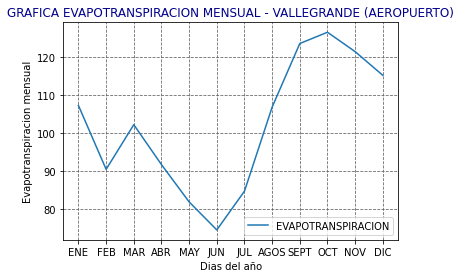

In [23]:
#finalmente graficamos para ver el comportamiento de la evapotranspiracion en el transcurso del año
dias_acumulados = [31,59,90,120,151,181,212,243,273,304,334,365]


#Grafica
plt.plot( meses,evap_mensual, label="EVAPOTRANSPIRACION", ls='-')

#plt.axis(v)
plt.title(f'GRAFICA EVAPOTRANSPIRACION MENSUAL - VALLEGRANDE (AEROPUERTO)', color='#00008B')
plt.xlabel('Dias del año')
plt.ylabel(f'Evapotranspiracion mensual')
plt.grid(b=True, which='major', color='#666668', linestyle='--')
plt.legend(loc=4)
plt.show()